<a href="https://colab.research.google.com/github/fernando-uf03/Data-Science-Studies/blob/main/data_science_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U -q PyDrive

In [ ]:
# Passo a Passo de um Projeto de Ciência de Dados\n,

#   "- Passo 1: Entendimento do Desafio\n",
#   "- Passo 2: Entendimento da Área/Empresa\n",
#   "- Passo 3: Extração/Obtenção de Dados\n",
#   "- Passo 4: Ajuste de Dados (Tratamento/Limpeza)\n",
#   "- Passo 5: Análise Exploratória\n",
#   "- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)\n",
#   "- Passo 7: Interpretação de Resultados"

In [ ]:
# Projeto Ciência de Dados - Previsão de Vendas\n",

#   "- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio\n",
#   "- TV, Jornal e Rádio estão em milhares de reais\n",
#   "- Vendas estão em milhões"

Saving advertising.csv to advertising (7).csv


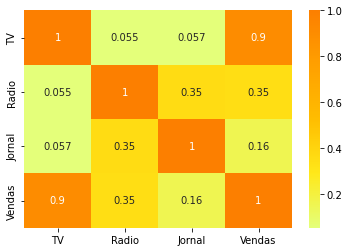

Linear Regression: 0.8820523674258838
Random Forest: 0.9313278732765005


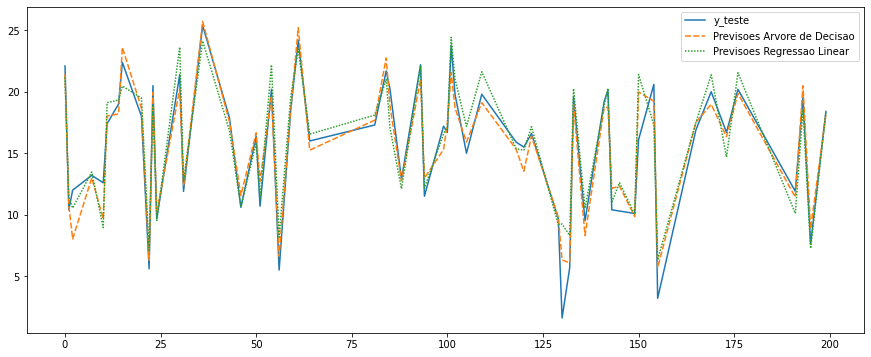

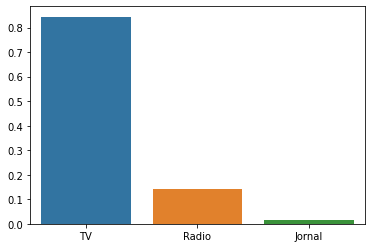

In [ ]:
# Importar a Base de dados
import pandas as pd
from google.colab import files
import io

# Code to read csv file into Colaboratory:
##from pydrive.auth import GoogleAuth
##from pydrive.drive import GoogleDrive
##from google.colab import auth
##from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
##auth.authenticate_user()
##gauth = GoogleAuth()
##gauth.credentials = GoogleCredentials.get_application_default()
##drive = GoogleDrive(gauth)

##downloaded = drive.CreateFile({'d/1Qy4XFg3YJ-YprVd6AnvNZEpJEhv2cqRf':d/1Qy4XFg3YJ-YprVd6AnvNZEpJEhv2cqRf}) 
##downloaded.GetContentFile('advertising.csv')  
##tabela = pd.read_csv('advertising.csv')
# Dataset is now stored in a Pandas Dataframe

uploaded = files.upload()
tabela = pd.read_csv(io.BytesIO(uploaded["advertising.csv"]))

# Análise Exploratória\n",
#   "- Vamos tentar visualizar como as informações de cada item estão distribuídas\n",
#   "- Vamos ver a correlação entre cada um dos itens"

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr(), annot=True, cmap="Wistia")
plt.show()

# Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning
# - Separando em dados de treino e dados de teste

from sklearn.model_selection import train_test_split

y = tabela["Vendas"]
x = tabela.drop("Vendas", axis = 1)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

# Temos um problema de regressão - Vamos escolher os modelos que vamos usar:
# - Regressão Linear
# - RamdomForest (Árvore de decisão)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Cria as inteligências artificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#treina as inteligencias artificiais
modelo_regressaolinear.fit(x_treino,y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

# teste da AI e avaliacao de qual o melhor modelo (isto eh, o que possui o menor erro)
# vamos usar o R² -> diz pra gnt o percentual q nosso modelo consegue explicar o q acontece

from sklearn import metrics

#criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)


#comparar os modelos
print("Linear Regression:", metrics.r2_score(y_teste, previsao_regressaolinear))
print("Random Forest:", metrics.r2_score(y_teste, previsao_arvoredecisao))


#Plotar gráficos de previsões da IA
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes Arvore de Decisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear
plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

# Como fazer uma nova previsao
# importar a nova_tabela com o pandas (a nova tabela tem que ter os dados de TV, Radio e Jornal)
# previsao = modelo_randomforest.predict(nova_tabela)
# print(previsao)

##nova_tabela = pd.read_csv(io.BytesIO(uploaded["novos.csv"]))
##display(nova_tabela)
##previsao = modelo_arvoredecisao.predict(nova_tabela)
##print(previsao)

# Mostrar qual a importância de cada variável para as vendas

sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

# Caso se queira comparar Radio com o Jornal
##print(df[["Radio", "Jornal"]].sum())
